In [2]:
# Perform basic setup
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
# Import the required libraries
from fastai.vision.all import *
from fastbook import *

from pathlib import Path

In [4]:
# Default options for matplotlib
matplotlib.rc('image', cmap='Greys')

In [5]:
# Setup the path to the dataset
home = Path.home()/'Dev'/'datasets'

In [6]:
# Set the path to the mnist data
mnist_data = Path(home/'mnist_sample')
mnist_data.ls()

(#3) [Path('/home/kilroy/Dev/datasets/mnist_sample/train'),Path('/home/kilroy/Dev/datasets/mnist_sample/valid'),Path('/home/kilroy/Dev/datasets/mnist_sample/labels.csv')]

In [7]:
# Check the train datasets
(mnist_data/'train').ls()

(#2) [Path('/home/kilroy/Dev/datasets/mnist_sample/train/3'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7')]

In [8]:
# Check the contents of label 3
(mnist_data/'train/3').ls()

(#6131) [Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/54304.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/41428.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/58602.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/8544.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/4234.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/44848.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/33953.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/21866.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/46449.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/3/24635.png')...]

In [9]:
# Check the contents of label 7
(mnist_data/'train/7').ls()

(#6265) [Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/46156.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/48422.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/59533.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/18757.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/632.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/48619.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/26916.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/40435.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/21483.png'),Path('/home/kilroy/Dev/datasets/mnist_sample/train/7/19493.png')...]

In [10]:
# Sort the labels for consistency
image_threes = (mnist_data/'train/3').ls().sorted()
image_sevens = (mnist_data/'train/7').ls().sorted()

In [11]:
# Check a sample three
Image.open(image_threes[1])

In [12]:
# Check a sample seven
Image.open(image_sevens[0])

In [13]:
# Create a tensor of sample image for reference
image_sample = Image.open(image_threes[1])
sample = tensor(image_sample)

In [14]:
# Render a slice of the tensor using gradients
df = pd.DataFrame(sample[4:15, 4:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [67]:
# List all the 3's and 7's tensors respectively
threes = [tensor(Image.open(i)) for i in image_threes]
sevens = [tensor(Image.open(i)) for i in image_sevens]

In [68]:
# Check the length of the lists
len(threes), len(sevens)

(6131, 6265)

<AxesSubplot:>

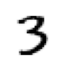

In [69]:
# Check an image
show_image(threes[1])

In [70]:
# Convert each list into a single stacked tensor and normalize pixel values
three = torch.stack(threes).float()/255
seven = torch.stack(sevens).float()/255

In [71]:
# Check the shape of the tensors
(three.shape), (seven.shape)

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [72]:
# Check the rank of the tensors
(three.ndim), (seven.ndim)

(3, 3)

<AxesSubplot:>

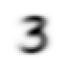

In [73]:
# Create the mean image of label 3 (take mean along dimension 0)
mean3 = three.mean(0)
show_image(mean3)

<AxesSubplot:>

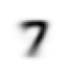

In [74]:
# Create the mean image of label 7 (take mean along dimension 0)
mean7 = seven.mean(0)
show_image(mean7)

<AxesSubplot:>

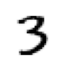

In [75]:
# Take a sample three
sample3 = three[1]
show_image(sample3)

<AxesSubplot:>

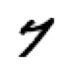

In [76]:
# Take a sample seven
sample7 = seven[1]
show_image(sample7)

In [77]:
# For the sample 3, calculate the L1 norm and L2 norm wrt mean 3
l1_three = (sample3 - mean3).abs().mean()
l2_three = ((sample3 - mean3) ** 2).mean().sqrt()

# Check the values of L1 norm and L2 norm
print(f'L1 Norm : {l1_three}')
print(f'L2 Norm : {l2_three}')

L1 Norm : 0.11143654584884644
L2 Norm : 0.20208320021629333


In [78]:
# For sample 3, calculate the L1 norm and L2 norm with mean 7
l1_seven = (sample3 - mean7).abs().mean()
l2_seven = ((sample3 - mean7) ** 2).mean().sqrt()

# Check the value of L1 norm and L2 norm
print(f'L1 Norm : {l1_seven}')
print(f'L2 Norm : {l2_seven}')

L1 Norm : 0.15861910581588745
L2 Norm : 0.30210891366004944


In [79]:
# Calculate the L1 loss and L2 loss wrt mean 3 loss using PyTorch
F.l1_loss(sample3, mean3), F.mse_loss(sample3, mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [80]:
# Calculate the L1 loss and L2 loss wrt mean 7 using PyTorch
F.l1_loss(sample3, mean7), F.mse_loss(sample3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [81]:
# For sample 7, calculate the L1 and L2 norms wrt mean 3 manually
l1_three = (sample7 - mean3).abs().mean()
l2_three = ((sample7 - mean3) ** 2).mean().sqrt()

print(f'L1 Norm : {l1_three}')
print(f'L2 Norm : {l2_three}')

L1 Norm : 0.1854187548160553
L2 Norm : 0.32709887623786926


In [82]:
# For sample 7, calculate the L1 and L2 norms wrt mean 7 manually
l1_seven = (sample7 - mean7).abs().mean()
l2_seven = ((sample7 - mean7) ** 2).mean().sqrt()

print(f'L1 Norm : {l1_seven}')
print(f'L2 Norm : {l2_seven}')

L1 Norm : 0.13037648797035217
L2 Norm : 0.2584923207759857


In [83]:
# Calculate the L1 loss and L2 loss wrt mean 3 using PyTorch
F.l1_loss(sample7, mean3), F.mse_loss(sample7, mean3).sqrt()

(tensor(0.1854), tensor(0.3271))

In [84]:
# Calculate the L1 loss and L2 loss wrt mean 7 using PyTorch
F.l1_loss(sample7, mean7), F.mse_loss(sample7, mean7).sqrt()

(tensor(0.1304), tensor(0.2585))

In [86]:
labels = [mean3, mean7]
samples = [three[3], three[6], three[100], seven[0], seven[1000], seven[99], seven [11]]

d = Tensor([F.mse_loss(i, j).sqrt().item() for i in samples for j in labels]).reshape(len(samples), 2)

df = pd.DataFrame(data=d, columns=['L2(3)', 'L2(7)'])

In [91]:
df.style.set_properties(**{'font-size' : '12pt'}).background_gradient('Blues')

,L2(3),L2(7)
0,0.206432,0.316974
1,0.210369,0.325873
2,0.260449,0.313991
3,0.303062,0.219570
4,0.263601,0.199486
5,0.318628,0.227463
6,0.250606,0.206986
